In [38]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

In [39]:
iris = sklearn.datasets.load_iris()

X = iris.data
Y = iris.target

print X.shape, Y.shape

(150, 4) (150,)


In [40]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y,test_size = 0.33, random_state=42)

In [41]:
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(100, 4)
(50, 4)
(100,)
(50,)


In [42]:
svd = sklearn.decomposition.TruncatedSVD()
X_train_centered = X_train - np.mean(X_train, axis = 0)
X_2d = svd.fit_transform(X_train_centered)

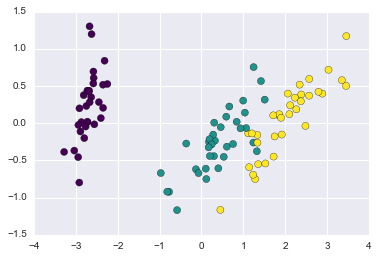

In [43]:
plt.scatter(X_2d[:,0],X_2d[:,1],c = Y_train, s =50, cmap = plt.cm.viridis)

In [44]:
k = np.arange(20) + 1

parameters = {'n_neighbors':k}
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
clf = sklearn.grid_search.GridSearchCV(knn, parameters, cv = 10)
clf.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [45]:
a = clf.grid_scores_
scores = [b.cv_validation_scores for b in a]

score_means = np.mean(scores, axis = 1)

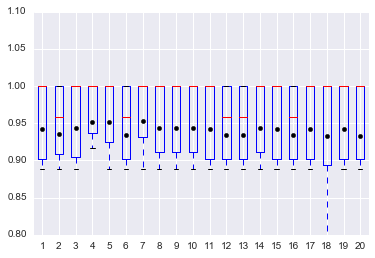

In [46]:
plt.boxplot(scores)
plt.scatter(k,score_means, c='k', zorder = 2)
plt.ylim(0.8, 1.1)
plt.show()

In [47]:
clf.best_params_

{'n_neighbors': 4}

In [51]:
sklearn.metrics.accuracy_score(Y_test,clf.predict(X_test))

0.97999999999999998

In [52]:
digits = sklearn.datasets.load_digits()

X = digits.data
Y = digits.target

print X.shape, Y.shape

(1797, 64) (1797,)


In [53]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y,test_size = 0.33, random_state = 42)

X_train_means = np.mean(X_train, axis = 0)
X_train_centered = X_train - X_train_means
X_test_centered = X_test - X_train_means

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(1203, 64)
(594, 64)
(1203,)
(594,)


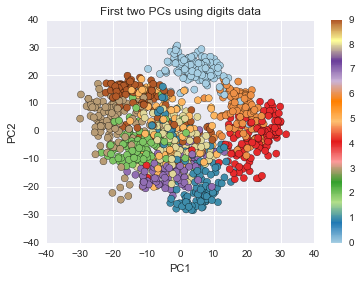

In [54]:
svd = sklearn.decomposition.TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_train_centered)

plt.scatter(X_2d[:,0],X_2d[:,1], c=Y_train, s = 50, cmap = plt.cm.Paired)
plt.colorbar()
plt.xlabel("PC1")
plt.ylabel('PC2')
plt.title('First two PCs using digits data')
plt.show()

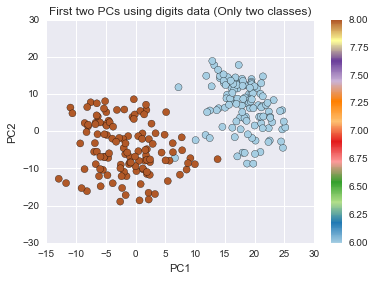

In [60]:
ind = np.logical_or(Y_train == 6, Y_train == 8)

plt.scatter(X_2d[ind,0],X_2d[ind,1],c = Y_train[ind],s = 50, cmap = plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using digits data (Only two classes)')
plt.show()

In [56]:
ind

array([ True,  True, False, ..., False, False,  True], dtype=bool)